# File 1: Data Exploration
## Stock Price Volatility & Sentiment ML Project

**Purpose:** Explore and understand our stock data before building models

**What we'll do:**
1. Load the processed stock data (AAPL, TSLA, MSFT)
2. Check data quality and statistics
3. Visualize stock prices over time
4. Understand our target variable (Up/Down days)
5. Look at technical indicators

---


## Step 1: Import Libraries


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set nice plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Libraries loaded successfully!')


✅ Libraries loaded successfully!


## Step 2: Load Data

We'll load the processed data that has:
- Stock prices (Close, Open, High, Low, Volume)
- Technical indicators (RSI, MACD, EMA, Bollinger Bands, etc.)
- Target variable (Price_Direction: 1=Up, 0=Down)

In [15]:
# Load final dataset
# UPDATE THIS PATH TO YOUR FILE LOCATION
df = pd.read_csv('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/data/final_dataset.csv')

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(f'📊 Dataset loaded!')
print(f'   Total rows: {len(df):,}')
print(f'   Total columns: {len(df.columns)}')
print(f'   Date range: {df["Date"].min().date()} to {df["Date"].max().date()}')
print(f'   Stocks: {df["Ticker"].unique()}')


📊 Dataset loaded!
   Total rows: 3,705
   Total columns: 26
   Date range: 2020-12-31 to 2025-12-01
   Stocks: ['AAPL' 'TSLA' 'MSFT']


In [16]:
# Show first few rows
print('First 5 rows of data:')
df.head()

First 5 rows of data:


,Date,Ticker,Close,Open,High,Low,Volume,RSI,EMA_20,EMA_50,...,BB_Width,Price_Change,Volatility_20,Daily_Return,High_Low_Range,Sentiment_Score,Sentiment_Positive_Ratio,Sentiment_Negative_Ratio,Daily_Sentiment,Price_Direction
0,2020-12-31,AAPL,132.69,134.08,134.7400,131.720,99116590,67.870651,129.147769,126.183412,...,19.228405,-0.007703,0.017811,-0.010367,0.022927,0.503445,0.503445,0.472102,0.553117,0
1,2021-01-04,AAPL,129.41,133.52,133.6116,126.760,143301900,62.114919,129.172743,126.309945,...,18.735863,-0.024719,0.018909,-0.030782,0.054052,0.503445,0.503445,0.472102,0.489619,1
2,2021-01-05,AAPL,131.01,128.89,131.7400,128.430,97664900,65.455459,129.347720,126.494261,...,18.077907,0.012364,0.018919,0.016448,0.025773,0.503445,0.503445,0.472102,0.568214,0
3,2021-01-06,AAPL,126.60,127.72,131.0499,126.382,155088000,47.728080,129.086033,126.498407,...,17.622517,-0.033662,0.020534,-0.008769,0.036935,0.503445,0.503445,0.472102,0.655748,1
4,2021-01-07,AAPL,130.92,128.36,131.6300,127.860,109578200,54.796422,129.260696,126.671803,...,17.260416,0.034123,0.021801,0.019944,0.029485,0.503445,0.503445,0.472102,0.480030,1


## Step 3: Data Quality Check

In [17]:
# Check for missing values
print('Checking for missing values...')
missing = df.isnull().sum()
if missing.sum() == 0:
    print('✅ No missing values! Data is clean.')
else:
    print('⚠️ Missing values found:')
    print(missing[missing > 0])

Checking for missing values...
✅ No missing values! Data is clean.


In [18]:
# Data types
print('Data types:')
df.dtypes

Data types:


Date                        datetime64[ns]
Ticker                              object
Close                              float64
Open                               float64
High                               float64
Low                                float64
Volume                               int64
RSI                                float64
EMA_20                             float64
EMA_50                             float64
MACD                               float64
MACD_Signal                        float64
MACD_Hist                          float64
BB_Upper                           float64
BB_Middle                          float64
BB_Lower                           float64
BB_Width                           float64
Price_Change                       float64
Volatility_20                      float64
Daily_Return                       float64
High_Low_Range                     float64
Sentiment_Score                    float64
Sentiment_Positive_Ratio           float64
Sentiment_N

In [19]:
# Basic statistics for key columns
print('Summary statistics:')
df[['Close', 'Volume', 'RSI', 'Volatility_20', 'Sentiment_Score', 'Price_Direction']].describe()

Summary statistics:


,Close,Volume,RSI,Volatility_20,Sentiment_Score,Price_Direction
count,3705.000000,3.705000e+03,3705.000000,3705.000000,3705.000000,3705.000000
mean,262.766762,6.538351e+07,53.111456,0.022833,0.503445,0.522267
std,96.655545,4.225981e+07,17.530664,0.012827,0.000000,0.499571
min,108.100000,7.164543e+06,3.142857,0.005960,0.503445,0.000000
25%,185.560000,2.934674e+07,40.433002,0.013387,0.503445,0.000000
50%,242.700000,5.738845e+07,52.784504,0.018606,0.503445,1.000000
75%,321.180000,8.934710e+07,66.287985,0.030582,0.503445,1.000000
max,542.070000,3.186799e+08,97.529911,0.075753,0.503445,1.000000


## Step 4: Target Variable Analysis

Our target variable is **Price_Direction**:
- 1 = Stock went UP the next day
- 0 = Stock went DOWN the next day

In [20]:
# Count up vs down days
print('Target Variable Distribution:')
print(df['Price_Direction'].value_counts())
print()

up_days = df['Price_Direction'].sum()
total_days = len(df)
down_days = total_days - up_days

print(f'Up days (1): {up_days:,} ({up_days/total_days*100:.1f}%)')
print(f'Down days (0): {down_days:,} ({down_days/total_days*100:.1f}%)')

if abs(up_days/total_days - 0.5) < 0.1:
    print('\n✅ Dataset is balanced! Good for training models.')
else:
    print('\n⚠️ Dataset is slightly imbalanced.')

Target Variable Distribution:
Price_Direction
1    1935
0    1770
Name: count, dtype: int64

Up days (1): 1,935 (52.2%)
Down days (0): 1,770 (47.8%)

✅ Dataset is balanced! Good for training models.


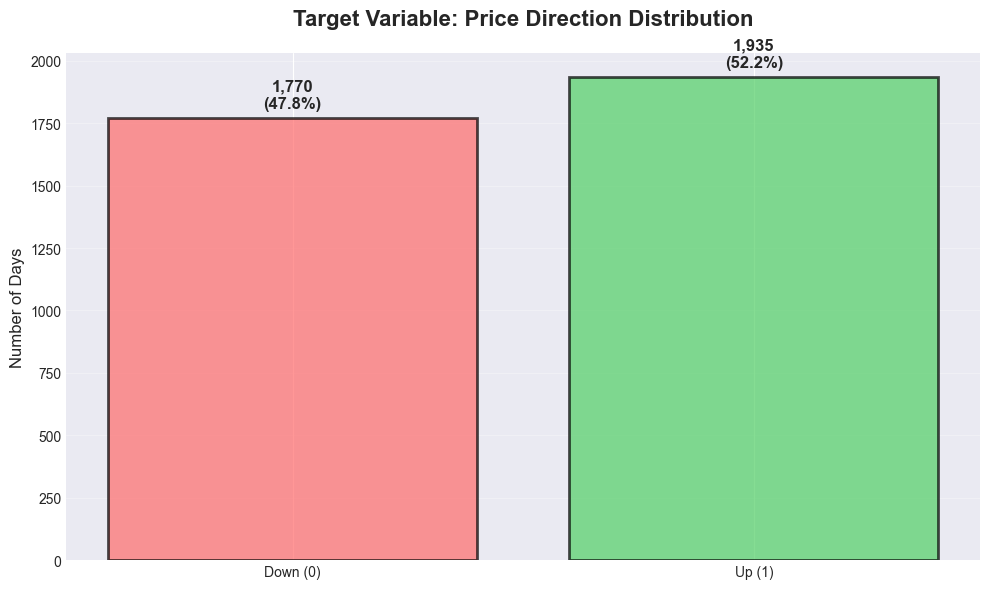

✅ Chart saved: 01_target_distribution.png


In [21]:
# Visualize target distribution
plt.figure(figsize=(10, 6))

counts = df['Price_Direction'].value_counts()
colors = ['#ff6b6b', '#51cf66']

bars = plt.bar(['Down (0)', 'Up (1)'], [counts[0], counts[1]], 
               color=colors, alpha=0.7, edgecolor='black', linewidth=2)

plt.title('Target Variable: Price Direction Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Days', fontsize=12)
plt.grid(alpha=0.3, axis='y')

# Add count and percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = height / total_days * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 30,
            f'{int(height):,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/01_target_distribution.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print('✅ Chart saved: 01_target_distribution.png')

## Step 5: Stock Price Trends

In [22]:
# Separate data by ticker using the Ticker column
aapl_data = df[df['Ticker'] == 'AAPL'].copy()
tsla_data = df[df['Ticker'] == 'TSLA'].copy()
msft_data = df[df['Ticker'] == 'MSFT'].copy()

print(f'AAPL: {len(aapl_data):,} days')
print(f'TSLA: {len(tsla_data):,} days')
print(f'MSFT: {len(msft_data):,} days')

AAPL: 1,235 days
TSLA: 1,235 days
MSFT: 1,235 days


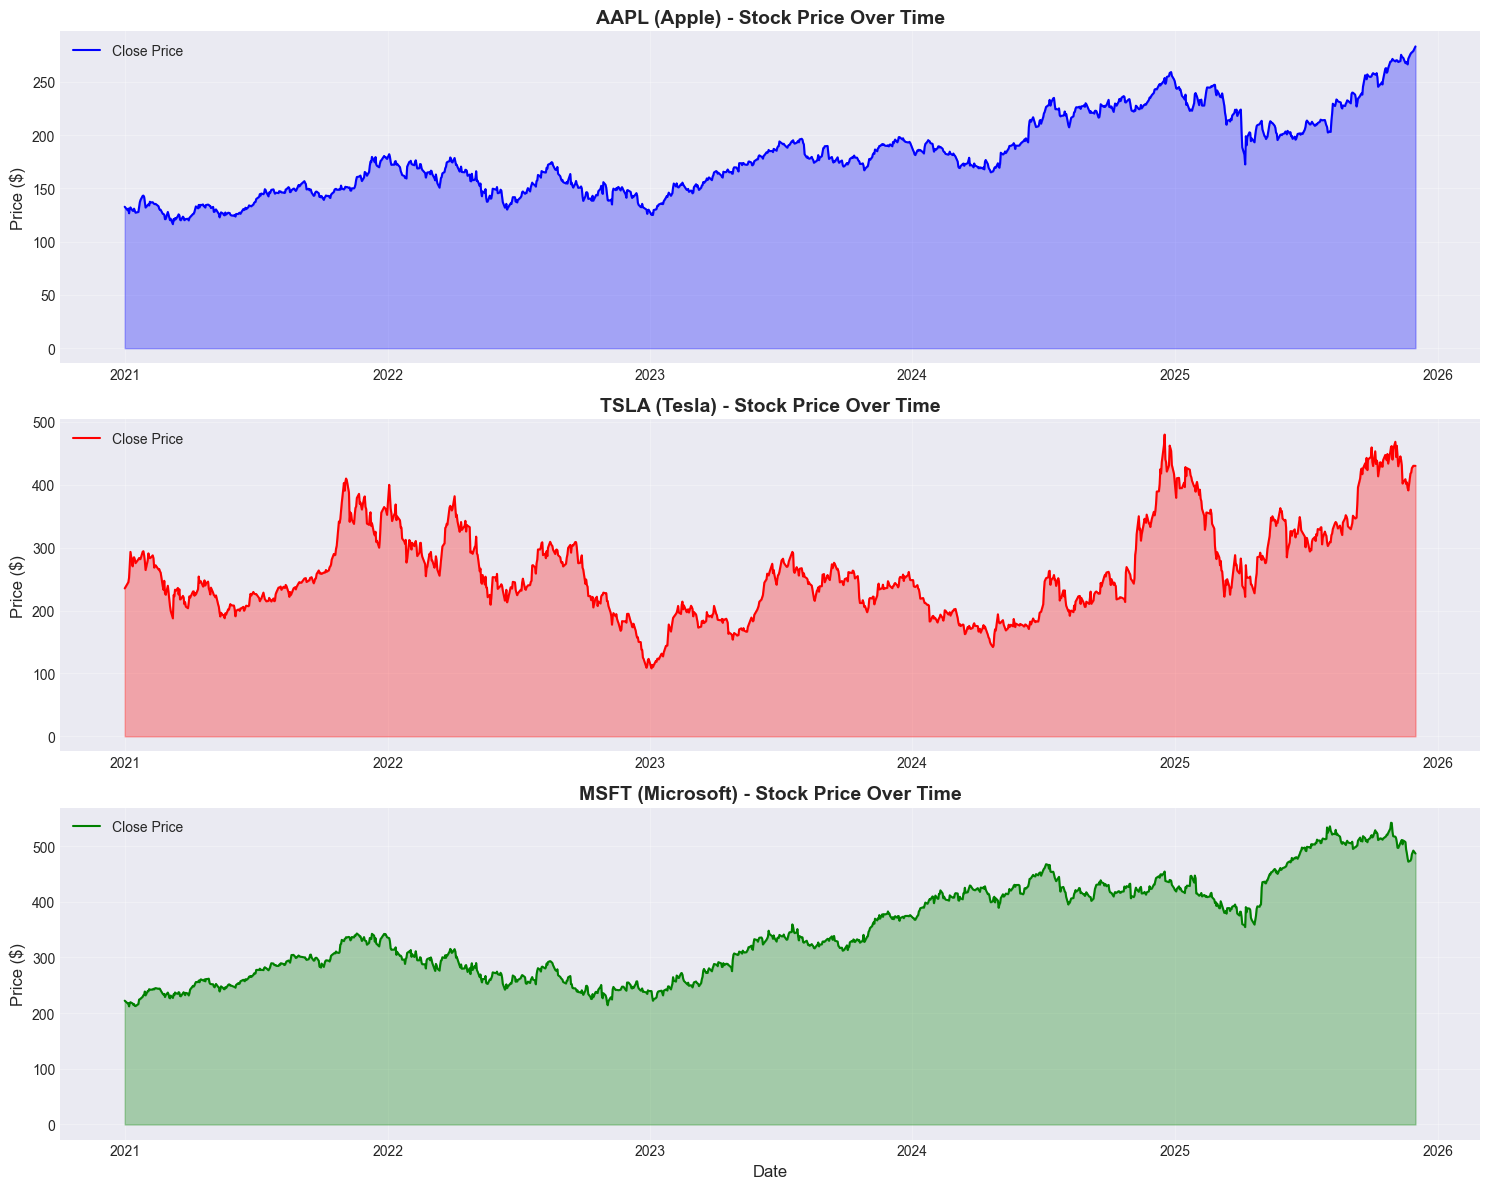

✅ Chart saved: 01_stock_price_trends.png


In [23]:
# Plot stock prices over time
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# AAPL
axes[0].plot(aapl_data['Date'], aapl_data['Close'], color='blue', linewidth=1.5, label='Close Price')
axes[0].fill_between(aapl_data['Date'], aapl_data['Close'], alpha=0.3, color='blue')
axes[0].set_title('AAPL (Apple) - Stock Price Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].legend()

# TSLA
axes[1].plot(tsla_data['Date'], tsla_data['Close'], color='red', linewidth=1.5, label='Close Price')
axes[1].fill_between(tsla_data['Date'], tsla_data['Close'], alpha=0.3, color='red')
axes[1].set_title('TSLA (Tesla) - Stock Price Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].legend()

# MSFT
axes[2].plot(msft_data['Date'], msft_data['Close'], color='green', linewidth=1.5, label='Close Price')
axes[2].fill_between(msft_data['Date'], msft_data['Close'], alpha=0.3, color='green')
axes[2].set_title('MSFT (Microsoft) - Stock Price Over Time', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Price ($)', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].grid(alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/01_stock_price_trends.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print('✅ Chart saved: 01_stock_price_trends.png')

## Step 6: Price Statistics by Stock

In [24]:
# Summary for each stock
print('='*70)
print('STOCK PRICE STATISTICS')
print('='*70)

for ticker, data in [('AAPL', aapl_data), ('TSLA', tsla_data), ('MSFT', msft_data)]:
    print(f'\n{ticker}:')
    print(f'  Trading days: {len(data):,}')
    print(f'  Min Price: ${data["Close"].min():.2f}')
    print(f'  Max Price: ${data["Close"].max():.2f}')
    print(f'  Avg Price: ${data["Close"].mean():.2f}')
    print(f'  Price Range: ${data["Close"].max() - data["Close"].min():.2f}')
    print(f'  Avg RSI: {data["RSI"].mean():.2f}')
    print(f'  Avg Volatility: {data["Volatility_20"].mean():.4f}')
    up_pct = data['Price_Direction'].mean() * 100
    print(f'  Up days: {up_pct:.1f}%')

STOCK PRICE STATISTICS

AAPL:
  Trading days: 1,235
  Min Price: $116.36
  Max Price: $283.10
  Avg Price: $179.87
  Price Range: $166.74
  Avg RSI: 53.74
  Avg Volatility: 0.0165
  Up days: 53.0%

TSLA:
  Trading days: 1,235
  Min Price: $108.10
  Max Price: $479.86
  Avg Price: $262.18
  Price Range: $371.76
  Avg RSI: 51.51
  Avg Volatility: 0.0366
  Up days: 51.7%

MSFT:
  Trading days: 1,235
  Min Price: $212.25
  Max Price: $542.07
  Avg Price: $346.25
  Price Range: $329.82
  Avg RSI: 54.08
  Avg Volatility: 0.0154
  Up days: 52.0%


## Step 7: Technical Indicators Visualization

Let's look at RSI (Relative Strength Index) for AAPL as an example

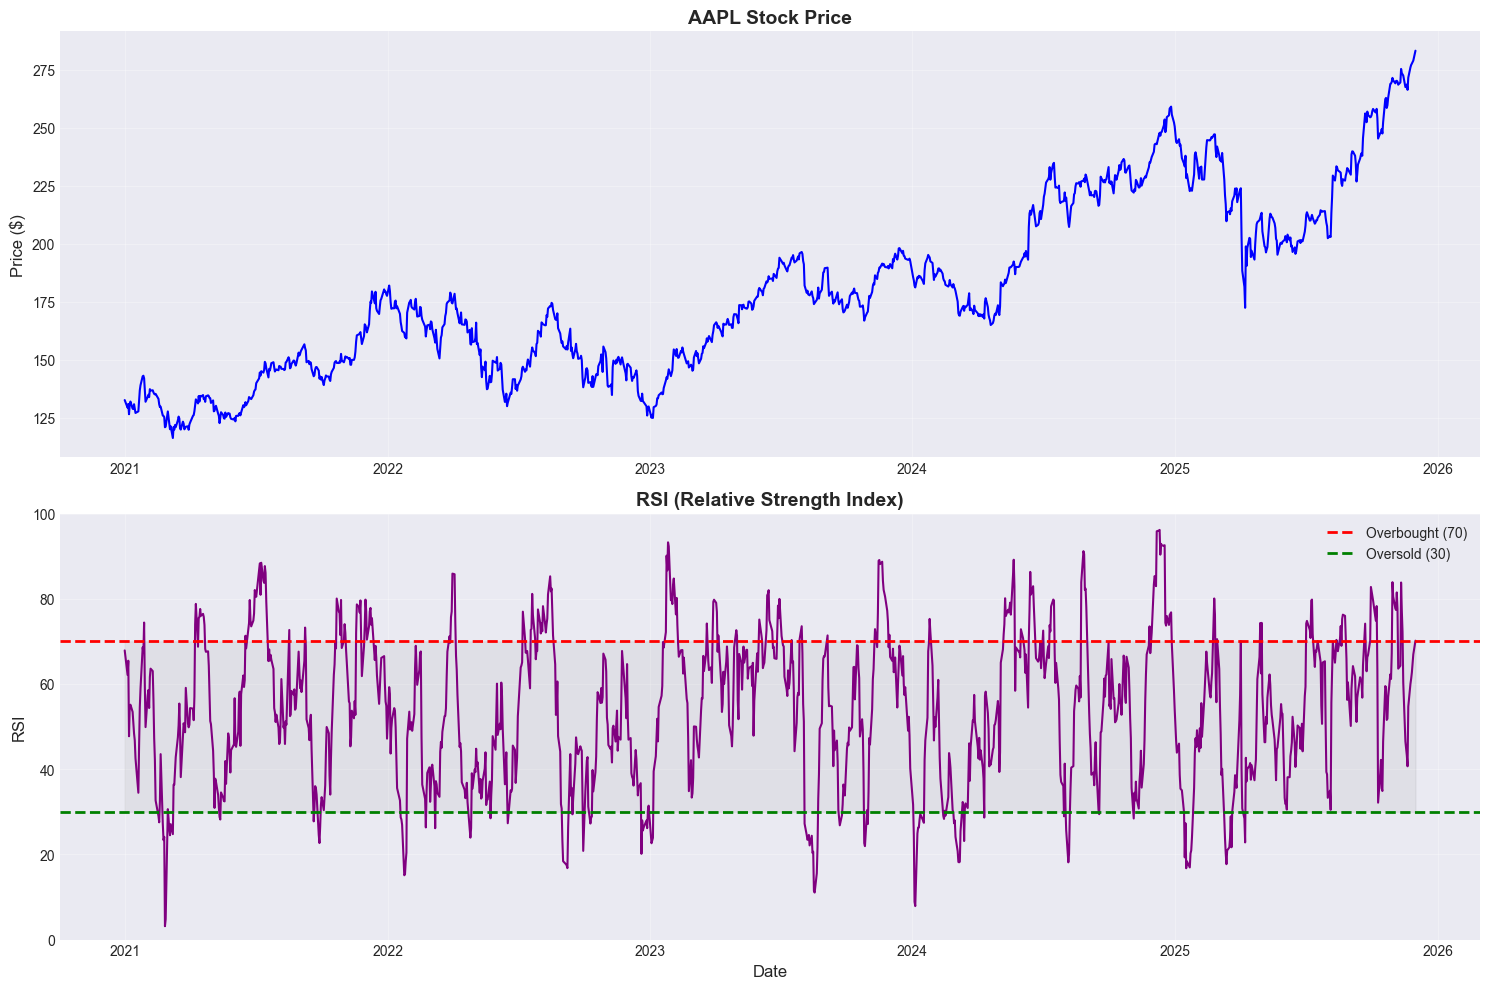

✅ Chart saved: 01_aapl_rsi.png


In [25]:
# Plot RSI for AAPL
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Stock price
axes[0].plot(aapl_data['Date'], aapl_data['Close'], color='blue', linewidth=1.5)
axes[0].set_title('AAPL Stock Price', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].grid(alpha=0.3)

# RSI
axes[1].plot(aapl_data['Date'], aapl_data['RSI'], color='purple', linewidth=1.5)
axes[1].axhline(y=70, color='red', linestyle='--', linewidth=2, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', linewidth=2, label='Oversold (30)')
axes[1].fill_between(aapl_data['Date'], 30, 70, alpha=0.1, color='gray')
axes[1].set_title('RSI (Relative Strength Index)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RSI', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylim(0, 100)
axes[1].legend(loc='upper right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/01_aapl_rsi.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print('✅ Chart saved: 01_aapl_rsi.png')

## Step 8: Sentiment Analysis

In [26]:
# Analyze sentiment features
print('='*70)
print('SENTIMENT ANALYSIS')
print('='*70)

print(f'\nOverall Sentiment Score: {df["Sentiment_Score"].mean():.3f}')
print(f'Positive Ratio: {df["Sentiment_Positive_Ratio"].mean():.3f}')
print(f'Negative Ratio: {df["Sentiment_Negative_Ratio"].mean():.3f}')

print(f'\nDaily Sentiment Statistics:')
print(f'  Min: {df["Daily_Sentiment"].min():.3f}')
print(f'  Max: {df["Daily_Sentiment"].max():.3f}')
print(f'  Mean: {df["Daily_Sentiment"].mean():.3f}')
print(f'  Std: {df["Daily_Sentiment"].std():.3f}')

SENTIMENT ANALYSIS

Overall Sentiment Score: 0.503
Positive Ratio: 0.503
Negative Ratio: 0.472

Daily Sentiment Statistics:
  Min: 0.179
  Max: 0.896
  Mean: 0.506
  Std: 0.099


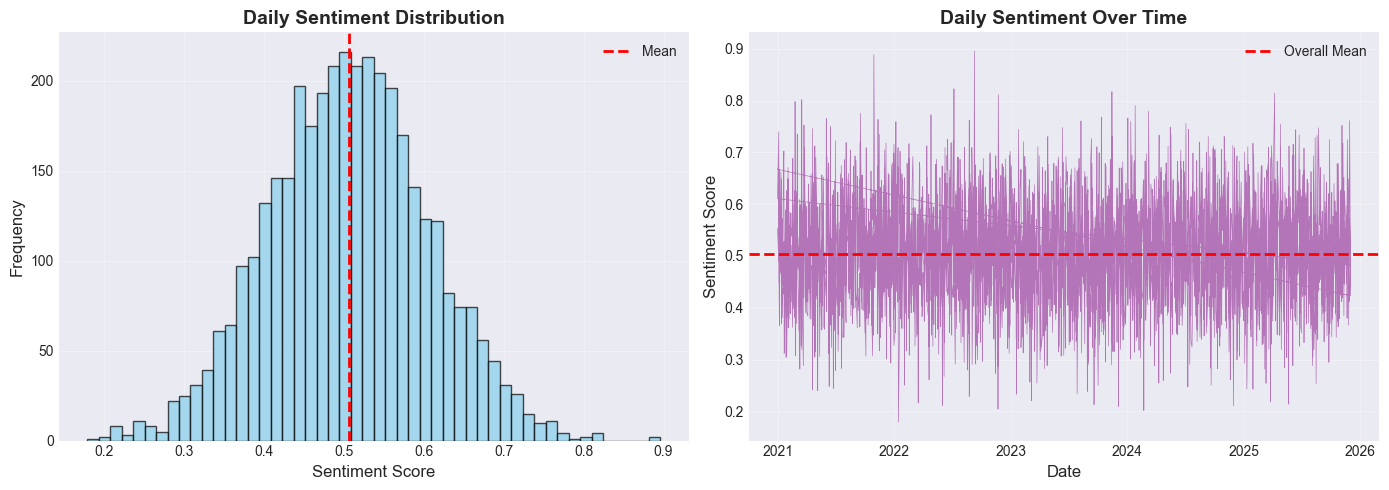

✅ Chart saved: 01_sentiment_analysis.png


In [27]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Daily Sentiment histogram
axes[0].hist(df['Daily_Sentiment'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['Daily_Sentiment'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].set_title('Daily Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Sentiment over time
axes[1].plot(df['Date'], df['Daily_Sentiment'], alpha=0.5, linewidth=0.5, color='purple')
axes[1].axhline(df['Sentiment_Score'].mean(), color='red', linestyle='--', linewidth=2, label='Overall Mean')
axes[1].set_title('Daily Sentiment Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Sentiment Score', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/01_sentiment_analysis.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print('✅ Chart saved: 01_sentiment_analysis.png')